# Data Question 1: An Exploration of UN data
Habeeb Kotun Jr.<br>
September 16, 2021

## Line Items 3 and 4
Import the required packages with their customary aliases.<br>
Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

# Ignore warnings throughout the code
warnings.filterwarnings("ignore")

## Line Item 5
Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.<br>
Take a look at the first 10 rows.<br>
Look at the last 5 rows. Do you see a problem?<br>
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
# Read in gdp_per_capita.csv
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
print(gdp_df.head(10))
print(gdp_df.tail())

# Read in gdp_per_capita.csv and skip the last two rows
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', 
                     skiprows=[6870, 6871])

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2019  2065.036398              NaN
1     Afghanistan  2018  2033.779002              NaN
2     Afghanistan  2017  2058.383832              NaN
3     Afghanistan  2016  2057.062164              NaN
4     Afghanistan  2015  2068.265904              NaN
5     Afghanistan  2014  2102.385234              NaN
6     Afghanistan  2013  2116.465454              NaN
7     Afghanistan  2012  2075.491747              NaN
8     Afghanistan  2011  1904.559799              NaN
9     Afghanistan  2010  1957.029338              NaN
     Country or Area                                      Year        Value  \
6865        Zimbabwe                                      1992  3054.889178   
6866        Zimbabwe                                      1991  3426.598094   
6867        Zimbabwe                                      1990  3324.348171   
6868   footnoteSeqID                                  Footnote          NaN   
6869       

## Line Item 6
Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [3]:
# Drop Value Footnotes column from gdp_df
gdp_df = gdp_df.drop(columns='Value Footnotes')

# Rename gdp_df columns
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


## Line Item 7
How many rows and columns does gdp_df have?<br>
Answer: 6868 rows and 3 columns

What are the data types of its columns?<br>
Answer: Country column has type object, Year column has type int64, and GDP_Per_Capita has type float64.

If any of the columns are not the expected types, figure out why and fix it. N/A

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


## Line Item 8
Which years are represented in this dataset?<br>
Answer: 1990 through 2019

Take a look at the number of observations per year. What do you notice?<br>
Answer: They have increased steadily over the years. This means over time more countries have reported their data. In 2018 the numbers start to decrease steadily.

In [5]:
# Call value_counts() on the Year column in gdp_df
gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

## Line Item 9
How many countries are represented in this dataset?<br>
Answer: 238 countries

Which countries are least represented in the dataset?<br>
Answer: Sint Maarten, Turks and Caicos, and Djibouti are the three least represented countries in this list.

Why do you think these countries have so few observations? Why do you think these countries have so few observations?<br>
Answer: Because they are countries that have only recently started reporting their data.

In [6]:
# Call value_counts() on the Country column in gdp_df
gdp_df['Country'].value_counts()

Jamaica                      30
Malawi                       30
Upper middle income          30
Niger                        30
Eswatini                     30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

## Line Items 10 and 11
Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.<br>
Use .describe() to find the summary statistics for GDP per capita in 2014.

In [7]:
# Extract 2014 data from gdp_df
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


## Line Item 12
Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram).<br>
How would you describe the shape of the distribution?<br>
Answer: The historgram is right skewed and unimodal.

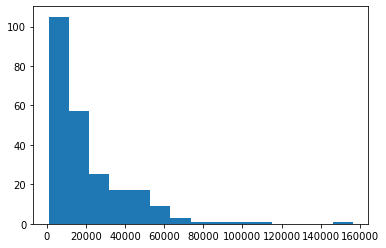

In [8]:
# Create a histogram of GDP per Capita for the 2014 data
plt.hist(gdp_2014['GDP_Per_Capita'], bins=15);

## Line Item 13
Find the top 5 countries and bottom 5 countries by GDP per capita in 2014.<br>
Answer: Top 5 countries are Bermuda, Singapore, Qatar, Luxembourg, and Macao SAR.<br>
Bottom 5 countries are Central African Republic, Burundi, Malawi, Dem. Rep. Congo, and Niger.

In [9]:
# Print top 5 and bottom 5 countries by GDP
print(gdp_2014.set_index('Country')['GDP_Per_Capita'].sort_values().tail())
print('\n')
print(gdp_2014.set_index('Country')['GDP_Per_Capita'].sort_values().head())

Country
Bermuda              77361.104881
Singapore            87808.663157
Qatar                95578.416973
Luxembourg          108760.916030
Macao SAR, China    156514.133850
Name: GDP_Per_Capita, dtype: float64


Country
Central African Republic     822.610458
Burundi                      886.235777
Malawi                      1027.208496
Dem. Rep. Congo             1029.790785
Niger                       1127.615541
Name: GDP_Per_Capita, dtype: float64


## Line Item 14
Now, return to the full dataset, gdp_df.<br>
Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount.<br>
Drop any rows that are missing values for either 1990 or 2017.<br>
Save the result to a dataframe named gdp_pivoted.

In [10]:
# Filter data for 1990 and 2017
subset = (gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)

# Pivot the data for 1990 and 2017 with Country on the rows and Year on the columns
gdp_pivoted = gdp_df[subset].pivot_table('GDP_Per_Capita', 
                                         index='Country', 
                                         columns='Year').dropna(0)

## Line Item 15
Create a new column in gdp_pivoted named Percent_Change.<br>
This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.<br>

In [11]:
# Create a  column for Percent Change in the pivited dataset
gdp_pivoted['Percent Change'] = (gdp_pivoted.loc[:,2017] - gdp_pivoted.loc[:,1990]) / gdp_pivoted.loc[:,1990]
print(gdp_pivoted)

Year                         1990          2017  Percent Change
Country                                                        
Albania               4842.734635  12811.759436        1.645563
Algeria               8746.352901  11737.409353        0.341978
Angola                5783.429064   7310.901738        0.264112
Antigua and Barbuda  15459.551675  19840.076123        0.283354
Arab World            9694.667544  14555.474921        0.501390
...                           ...           ...             ...
Vanuatu               2888.309393   3116.645194        0.079055
Vietnam               1673.249634   7155.745829        3.276556
World                 9680.269697  16253.385518        0.679022
Zambia                2190.182814   3485.005238        0.591194
Zimbabwe              3324.348171   3028.245976       -0.089071

[207 rows x 3 columns]


## Line Item 16
How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?<br>
Answer: 17 countries

In [12]:
# Count number of countries in gdp_pivoted that had a negative percent change
print(gdp_pivoted[gdp_pivoted.loc[:,'Percent Change'] < 0].count())

Year
1990              17
2017              17
Percent Change    17
dtype: int64


## Line Item 17
Which country had the highest % change in GDP per capita?<br>
Create a line plot showing this country's GDP per capita for all years from 1990 to 2017.<br>
Answer: Equatorial Guinea had the highest % change in GDP per capita.

Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?<br>
Answer: Guinea's plot shows a steady rise in GDP per capita until around 2008 when it started to decrease. In comparison, China has been exponentially growing its GDP per capita with no decreases seen over the years.Both countries look like they started around 200 GDP per capita in 1990. Although they're trends have differed over the years, it seems they will be close to converging to roughly the same GDP per capita in the coming years.<br>

Bonus: Put both line charts on the same plot.

In [13]:
# Filter out the two countries with the highest Percent Change
gdp_sort = gdp_pivoted.sort_values("Percent Change", ascending=False).head(2)
gdp_sort

Year,1990,2017,Percent Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,20.684046
China,1423.896348,14344.421239,9.074063


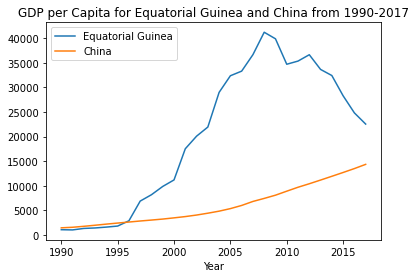

In [14]:
# Extract all Equatorial Guinea and China data from gdp_df
guinea_1990_2017 = gdp_df.set_index('Country').loc['Equatorial Guinea']
china_1990_2017 = gdp_df.set_index('Country').loc['China']

# Graph GDP_Per_Capita for Equatorial Guinea and China from 1990-2017
ax = guinea_1990_2017[(guinea_1990_2017['Year'] <= 2017)].plot(x='Year',
                                                               y='GDP_Per_Capita')
china_1990_2017[(china_1990_2017['Year'] <= 2017)].plot(ax=ax, 
                                                        x='Year',
                                                        y='GDP_Per_Capita', 
                                                        title='GDP per Capita for Equatorial Guinea and China from 1990-2017')
ax.legend(['Equatorial Guinea','China']);

## Line Item 18
Read in continents.csv contained in the data folder into a new dataframe called continents.

In [15]:
# Read in continents.csv
continents = pd.read_csv('../data/continents.csv')

## Line Item 19
Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [16]:
# Inner join of gdp_df and continents dataframes
gdp_df = pd.merge(right=gdp_df, left=continents, how='inner')

## Line Item 20
Determine the number of countries per continent. Create a bar chart showing this.

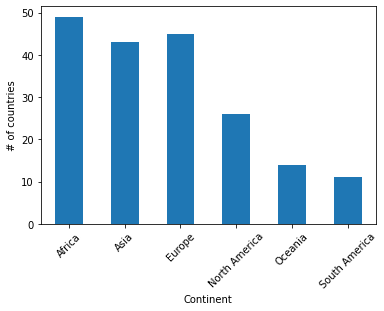

In [17]:
# Graph bar plot showing the number of countries per continent
gdp_df.groupby('Continent')['Country'].nunique().plot(kind='bar', rot=45, ylabel='# of countries');

## Line Item 21
Create a seaborn boxplot showing GDP per capita in 2014 split out by continent.<br>
What do you notice?<br>
Answer: Europe had the highest median GDP_Per_Capita in 2014 than any other continent and Africa had the lowest.<br>
Africa's overall IQR is very small meaning a majority of the data doesn't deviate to far from the already low median.<br>
Asia has the most extreme outliers with one reaching close to 160000. Even with this extreme outlier, the median GDP and IQR are much lower. This shows that Asia had the biggest wealth gap within it's continent in 2014.<br>
South America has no outliers outside of its whiskers. In addition, the IQR and whisker lengths are relatively small. One can conclude that this means the countries within South America had a relatively close GDP per capita in 2014.

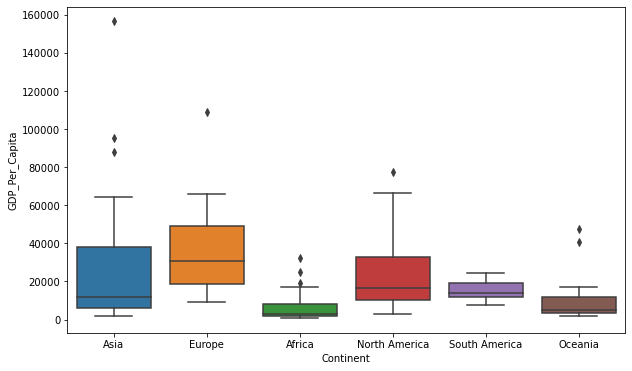

In [18]:
# Increasing plot size
fig, ax = plt.subplots(figsize=(10, 6))

# Create seaborn boxplot showing GDP per Capita in 2014 pre continent
sns.boxplot(x='Continent', 
            y='GDP_Per_Capita', 
            data=gdp_df[gdp_df['Year'] == 2014][['Continent', 'GDP_Per_Capita']], 
            ax=ax);

## Line Items 22 and 23
Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this.

Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
# Read in internet_use.csv
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

# Drop Value Footnotes column from internet_df
internet_df = internet_df.drop(columns='Value Footnotes').dropna(0)

# Rename columns of internet_df
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

# Change Year column of internet_df from object type to int64
internet_df['Year'] = internet_df['Year'].astype('int64')
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.5+ KB
None


b'Skipping line 4675: expected 4 fields, saw 6\n'


## Line Item 24
How many rows and columns does this new dataset have?<br>
Answer: 4495 rows and 3 columns
What are the types of its columns?<br>
Answer: Country column has type object, year column has type object, Internet_User_Pct has type float64.<br>
Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

## Line Item 25
What is the first year that has a nonzero internet users percentage reported?<br>
Answer: 1990<br>
What is the general trend in internet users percentage over the years? Pick a visualization that you think illustrates this trend well.

In [20]:
# Determine the first year that has a nonzero internet users %
print(internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min())

1990


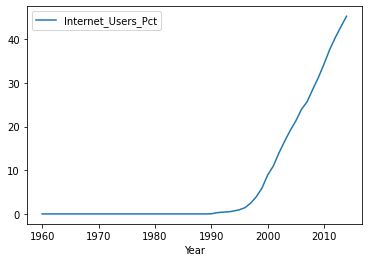

In [21]:
# Graph general trend in internet users percentage over the years
internet_df.groupby('Year').agg('mean').plot();

## Line Item 26
Merge `gdp_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables.  

In [22]:
# Merge gdf_df and internet_df
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how="inner", on=['Country','Year'])

## Line Item 27
Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [23]:
# Print head and tail of internet_df
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

  Continent      Country  Year  GDP_Per_Capita  Internet_Users_Pct
0      Asia  Afghanistan  2014     2102.385234            6.390000
1      Asia  Afghanistan  2013     2116.465454            5.900000
2      Asia  Afghanistan  2012     2075.491747            5.454545
3      Asia  Afghanistan  2011     1904.559799            5.000000
4      Asia  Afghanistan  2010     1957.029338            4.000000
     Continent   Country  Year  GDP_Per_Capita  Internet_Users_Pct
3453    Africa  Zimbabwe  1997     3580.048793            0.033080
3454    Africa  Zimbabwe  1996     3520.430146            0.016790
3455    Africa  Zimbabwe  1995     3226.413930            0.007684
3456    Africa  Zimbabwe  1994     3263.934978            0.001739
3457    Africa  Zimbabwe  1990     3324.348171            0.000000


## Line Item 28
Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`.<br> How many countries have at least 90% internet users in 2014? 13 countries

In [24]:
# Extract 2014 data from gdp_and_internet_use
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

# Extract Countries with at least 90% internet users from gdp_and_internet_use_2014
print(gdp_and_internet_use_2014[gdp_and_internet_use['Internet_Users_Pct'] >= 90].describe())

         Year  GDP_Per_Capita  Internet_Users_Pct
count    13.0       13.000000           13.000000
mean   2014.0    60546.591803           93.466922
std       0.0    21075.231054            2.619204
min    2014.0    39376.884505           90.400000
25%    2014.0    48201.085018           91.490000
50%    2014.0    52214.537753           92.520000
75%    2014.0    62589.373548           95.990000
max    2014.0   108760.916030           98.160000


## Line Item 29
Find the countries that had the top 3 largest GDP per capita figures for 2014.<br>
Answer: Luxembourg, Qatar, and Singapore

Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country.  What trends do you notice?<br>
Answer: The Internet User % for these countries has been steadily increasing over time.

     Continent     Country  Year  GDP_Per_Capita  Internet_Users_Pct
1798    Europe  Luxembourg  2014   108760.916030               94.67
2542      Asia       Qatar  2014    95578.416973               91.49
2772      Asia   Singapore  2014    87808.663157               82.00


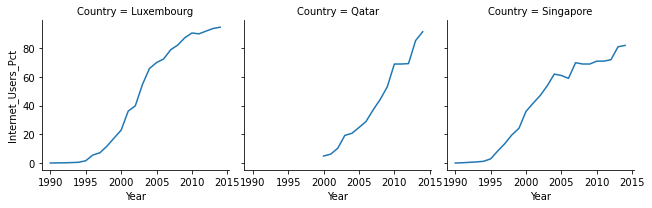

In [25]:
# Extract the 3 highest countries by GDP_Per_Capita from gdp_and_internet_use_2014
gdp_and_internet_use_2014_top3_gdp = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head(3)
print(gdp_and_internet_use_2014_top3_gdp)

# Graph the Internet User % for Luxembourg, Qatar, and Singaapore
graph = sns.FacetGrid(gdp_and_internet_use.set_index('Country').loc[['Luxembourg', 'Qatar', 'Singapore']].reset_index(),
                      col='Country')
graph.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

## Line Item 30
 Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?<br>
 Answer: There appears to be a positive correlation between Internet Use % and GDP Per Capita in 2014, meaning that in 2014 the higher a country's GDP per Capita the higher that country's Internet Use Percentage.

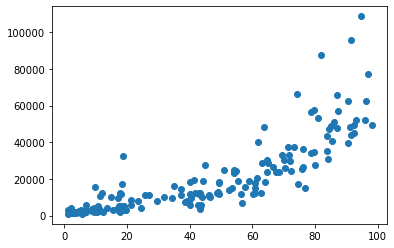

In [26]:
# Create a scatterplot of Internet Use vs GDP per Capita
plt.scatter(x=gdp_and_internet_use_2014['Internet_Users_Pct'], 
            y=gdp_and_internet_use_2014['GDP_Per_Capita'])

## Line Item 31
Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?<br>
Answer: Because the correlation is a positive number close to 1, this means in 2014 Internet Use % and GDP Per Capita had a strong, positive correlation.

In [27]:
# Calculate correlation between GDP per Capita and Internet Use for the year 2014
gdp_and_internet_use_2014[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.824627
Internet_Users_Pct,0.824627,1.000000


## Line Item 32
Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita.<br>
Find the correlation between the log of GDP per capita and internet users percentage.<br>
How does this compare to the calculation in the previous part?<br>
Answer: The log of GDP per Capita has a stronger correlation with Internet Users % than the unmodified GDP per Capita.

In [28]:
# Create a new column in gdp_and_internet_use_2014 with the logarithm of GDP per capita
gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log10(gdp_and_internet_use_2014['GDP_Per_Capita'])

# Calculate correlation between the log of GDP per capita and internet users %
gdp_and_internet_use_2014[['GDP_Per_Capita_Log', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita_Log,Internet_Users_Pct
GDP_Per_Capita_Log,1.000000,0.903987
Internet_Users_Pct,0.903987,1.000000


## Line Item 33
Filter the original dataset down to just the United States for all available years.<br>
Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?<br>
Answer:This info isn't necessarily helpful. While we do get a high correlation between the two, they both naturally increased over time with no clear signs from our data that a growth in one was caused by another. Due to us just doing an observational study we can't conclude causation between the two variables.

In [29]:
# Filter United States data from gdp_and_internet_use
gdp_and_internet_use_usa = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']
print(gdp_and_internet_use_usa)

# Calculate correlation between internet use and gdp per capita for the United States.
gdp_and_internet_use_usa[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

          Continent        Country  Year  GDP_Per_Capita  Internet_Users_Pct
3348  North America  United States  2014    57273.129074           87.360000
3349  North America  United States  2013    56269.956427           84.200000
3350  North America  United States  2012    55632.929764           79.300000
3351  North America  United States  2011    54806.116927           69.729461
3352  North America  United States  2010    54359.133974           71.690000
3353  North America  United States  2009    53440.911538           71.000000
3354  North America  United States  2008    55314.660060           74.000000
3355  North America  United States  2007    55916.715383           75.000000
3356  North America  United States  2006    55411.437548           68.931193
3357  North America  United States  2005    54395.356484           67.968053
3358  North America  United States  2004    53035.782913           64.758256
3359  North America  United States  2003    51569.817690           61.697117

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.00000,0.99166
Internet_Users_Pct,0.99166,1.00000
